<a href="https://colab.research.google.com/github/chamikara94/RNN_Stock_Prediction/blob/main/Stock_Prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [7]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
# Creating a data structure with 60 timestep and 1 output
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
#Reshaping
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [10]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
# Initialising the RNN
regressor = Sequential()

In [12]:
# Adding the first LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [13]:
# Adding a second LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add (Dropout(0.2))

In [14]:
# Adding a third LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [15]:
#Adding a fourth LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [16]:
# Adding the output Layer
regressor.add(Dense(units=1))

In [17]:
# Compiling the RNN
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [18]:
# Fitting the RNN to Training set
regressor.fit(x_train,y_train,epochs=100,batch_size=32)


Epoch 1/100
38/38 [==============================] - 12s 116ms/step - loss: 0.0382
Epoch 2/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0051
Epoch 11/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0040
Epoch 13/100

In [19]:
# Load the real stock price of 2017
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [20]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


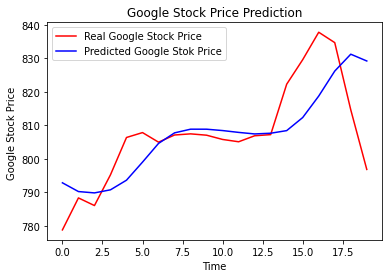

In [21]:
# Visualising the resaults
plt.plot(real_stock_price,color = 'red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price,color = 'blue',label = 'Predicted Google Stok Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price ')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')